In [1]:
import numpy as np
import pyaudio
import wave
import matplotlib.pyplot as plt
import struct
from scipy.io import wavfile
import os
from sklearn.neural_network import MLPClassifier
import pandas as pd
from scipy.fftpack import fft,fftfreq
from scipy import signal
import math

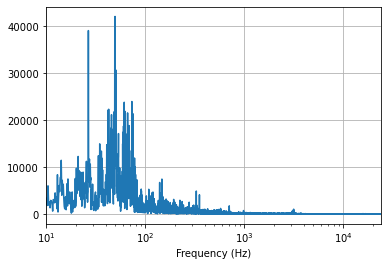

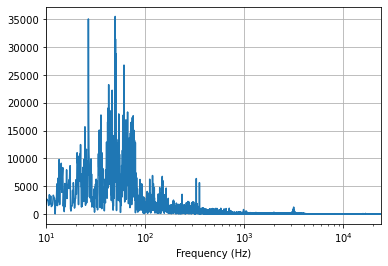

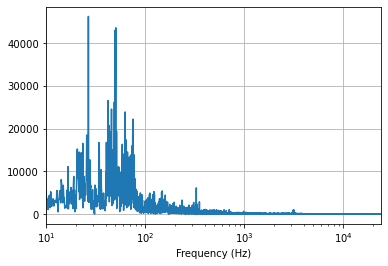

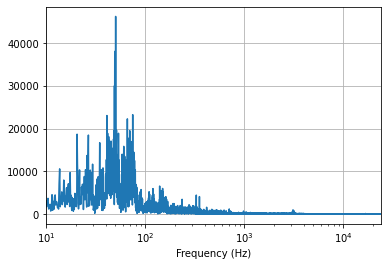

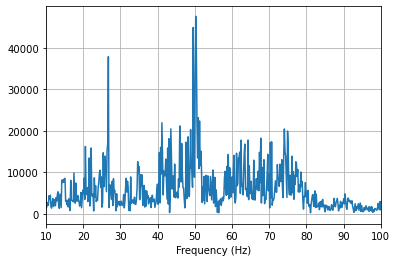

In [37]:
samplerate, data = wavfile.read('./training/training_ambient_noise1.wav')
data = data[200000:]
data = (data - data.mean()) / data.std()
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show() 

samplerate, data = wavfile.read('./training/training_ambient_noise2.wav')
data = data[200000:]
data = (data - data.mean()) / data.std()
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show() 

samplerate, data = wavfile.read('./training/training_ambient_noise3.wav')
data = data[200000:]
data = (data - data.mean()) / data.std()
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show() 

samplerate, data = wavfile.read('./training/training_ambient_noise4.wav')
data = data[200000:]
data = (data - data.mean()) / data.std()
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show() 

samplerate, data = wavfile.read('./training/training_ambient_noise5.wav')
data = data[200000:]
data = (data - data.mean()) / data.std()
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, 100] )
#plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show() 


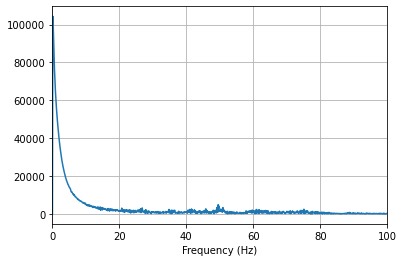

In [55]:
samplerate, data = wavfile.read('./training/training_no_piece5.wav')
#data = data[200000:]
data = (data - data.mean()) / data.std()
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [0, 100] )
#plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show() 

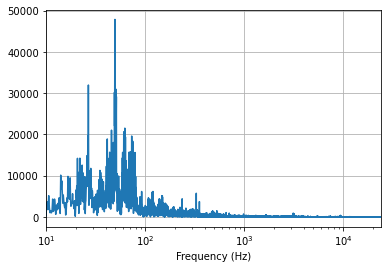

In [142]:

samplerate, data = wavfile.read('./training/training_no_piece5.wav')

data = data[200000:]
data = (data - data.mean()) / data.std()

samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show()

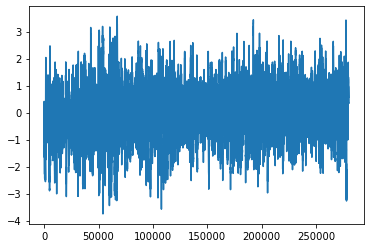

In [143]:
plt.plot(data)

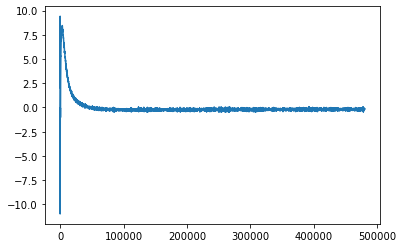

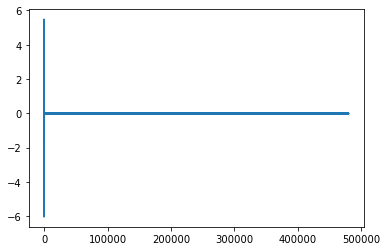

In [209]:
samplerate, data = wavfile.read('./training/training_no_piece5.wav')

#data = data[200000:]
data = (data - data.mean()) / data.std()

plt.plot(data)
plt.show()

sos = signal.butter(70, 0.3, 'hp', output='sos')
data = signal.sosfilt(sos, data)
plt.plot(data)

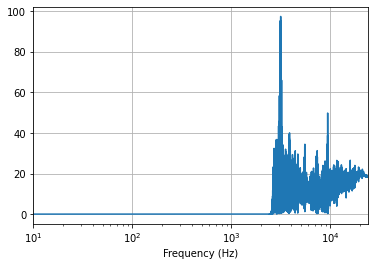

In [206]:
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show()

48000


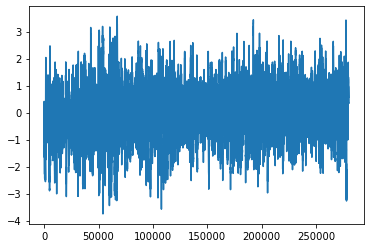

In [17]:
samplerate, data = wavfile.read('./training/training_no_piece5.wav')

data = data[200000:]
data = (data - data.mean()) / data.std()

print(samplerate)

plt.plot(data)
plt.show()

In [3]:
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [0, 100] )
#plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show() 

NameError: name 'data' is not defined

# New and Working Filter

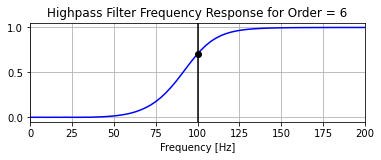

In [16]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='hp', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y



# Filter requirements.
order = 6
fs = samplerate       # sample rate, Hz
cutoff = 100  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_highpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, cutoff * 2)
plt.title(f"Highpass Filter Frequency Response for Order = {order}")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

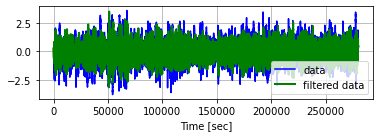

In [6]:

y = butter_highpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(data, 'b-', label='data')
plt.plot(y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

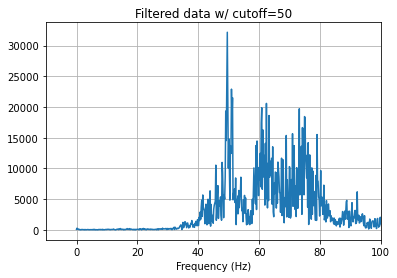

In [7]:
samples = y.shape[0]
yfft = fft(y)
fftabs = abs(yfft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [-10, 100] )
#plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.title(f"Filtered data w/ cutoff={cutoff}")
plt.show()

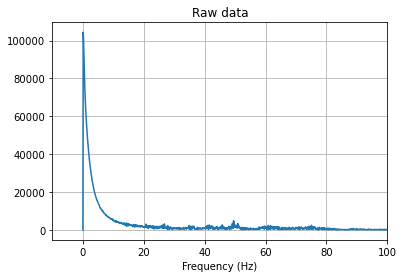

In [174]:
samplerate, data = wavfile.read('./training/training_no_piece5.wav')

#data = data[200000:]
data = (data - data.mean()) / data.std()

samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [-10, 100] )
#plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.title("Raw data")
plt.show()

## Testing filter for different cutoff frequencies

It seems like the intial noise is still retained after filtering, but the gain will decrease as the cutoff moves further away. What is the optimal cutoff frequnecy to balance loss of information and reduction of very low frequency signal.

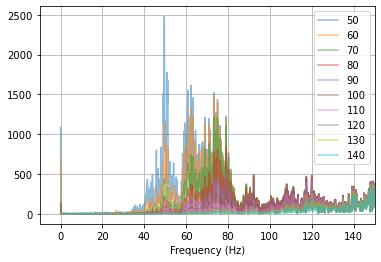

In [19]:
samplerate, data = wavfile.read('./training/training_no_piece5.wav')
data = (data - data.mean()) / data.std()
data = data[200000:]

temp = []
for i in range(5,15):
    cutoff = i * 10
    y = butter_highpass_filter(data, cutoff, fs, order)
    temp.append(cutoff)
    samples = y.shape[0]
    yfft = fft(y)
    fftabs = abs(yfft)
    freqs = fftfreq(samples,1/samplerate)
    plt.xlim( [-10, 150] )
    #plt.xscale( 'log' )
    plt.grid( True )
    plt.xlabel( 'Frequency (Hz)' )
    plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)], alpha=0.5)
plt.legend(temp);

Things noticed:

 - It looks like the filter is working, the only issue is regarding how "steep" the cutoff is. It is not sharp enough to completely eliminate noise before the filter.
 - Explore filter order further to see if more precise filter is achievable
 - Explore where audio events occur, can we scrap all frequencies <150Hz (for example) to reduce complexity while still retaining useful information.
 
**Question**: is the sampling frequency of our audio signal too large? We are sampling at 48kHz and then trying to filter 50Hz. I believe this may be problematic as cutoff frequencies are expresed as fractions of the sampling frequency (since we are using a normalized cutoff frequency that results to be a very small fraction). Decreasing the sampling frequency may make filtering such small frequencies more managable.